In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('/content/drive/MyDrive/GitHub Project/marketing_campaign.csv', sep = '\t')

# **Description**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [5]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [7]:
df.duplicated().sum()

0

# **Prepocessing**

In [8]:
df[['Z_CostContact', 'Z_Revenue']].nunique()

,0
Z_CostContact,1
Z_Revenue,1


### **Drop irrevalent columns:\**

In [9]:
df = df.drop(['ID','Z_CostContact','Z_Revenue'], axis = 1)

In [10]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### **Time**

In [11]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst = True)
df['Dt_Customer'].head()

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19


### **减少无关特征**

In [12]:
df['Education'] = df['Education'].replace(['Phd','Master'], 'Postgraduate')
df['Education'] = df['Education'].replace(['2n Cycle','Graduation'], 'Graduate')
df['Education'] = df['Education'].replace(['Basic'], 'Undergraduate')
df['Education'].head()

,Education
0,Graduate
1,Graduate
2,Graduate
3,Graduate
4,PhD


In [13]:
df['Marital_Status'] = df['Marital_Status'].replace(['Married','Together'],'Not_Single')
df['Marital_Status'] = df['Marital_Status'].replace(['Single','Divorced','Widow','Alone','Absurd','YOLO'],'Single')
df['Marital_Status'].head()

,Marital_Status
0,Single
1,Single
2,Not_Single
3,Not_Single
4,Not_Single


In [14]:
lastest_day = df['Dt_Customer'].max()
df['Day_is_client'] = (lastest_day - df['Dt_Customer']).dt.days
df['Day_is_client'].head()

,Day_is_client
0,663
1,113
2,312
3,139
4,161


In [15]:
df['Kid'] = df['Kidhome']+ df['Teenhome']

df['Expense'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']
+ df['MntSweetProducts'] + df['MntGoldProds']

df['TotalCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

df['TotalNumPurchase'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases']
+ df['NumStorePurchases'] + df['NumWebVisitsMonth']

df.head()


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Day_is_client,Kid,Expense,TotalCmp,TotalNumPurchase
0,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,1,663,0,1441,0,21
1,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,113,2,20,0,4
2,1965,Graduate,Not_Single,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,312,0,713,0,11
3,1984,Graduate,Not_Single,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,139,1,45,0,4
4,1981,PhD,Not_Single,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,161,1,380,0,13


In [16]:
data = df.copy()
df = df[['Education', 'Marital_Status', 'Income', 'Kid', 'Day_is_client', 'Recency', 'Expense', 'TotalNumPurchase',
         'TotalCmp', 'Complain', 'Response']]


In [17]:
df.dropna(inplace=True)
df.shape

<ipython-input-17-1e8442348ac0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


(2216, 11)

In [18]:
df.isnull().sum()

,0
Education,0
Marital_Status,0
Income,0
Kid,0
Day_is_client,0
Recency,0
Expense,0
TotalNumPurchase,0
TotalCmp,0
Complain,0


In [19]:
df.head()

,Education,Marital_Status,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response
0,Graduate,Single,58138.0,0,663,58,1441,21,0,0,1
1,Graduate,Single,46344.0,2,113,38,20,4,0,0,0
2,Graduate,Not_Single,71613.0,0,312,26,713,11,0,0,0
3,Graduate,Not_Single,26646.0,1,139,26,45,4,0,0,0
4,PhD,Not_Single,58293.0,1,161,94,380,13,0,0,0


In [20]:
df.dtypes

,0
Education,object
Marital_Status,object
Income,float64
Kid,int64
Day_is_client,int64
Recency,int64
Expense,int64
TotalNumPurchase,int64
TotalCmp,int64
Complain,int64


In [21]:
df_n = df.select_dtypes(['int64','float64'])
df_n.head()

,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response
0,58138.0,0,663,58,1441,21,0,0,1
1,46344.0,2,113,38,20,4,0,0,0
2,71613.0,0,312,26,713,11,0,0,0
3,26646.0,1,139,26,45,4,0,0,0
4,58293.0,1,161,94,380,13,0,0,0


### **Outlier**

In [22]:
from scipy import stats

z_scores = np.abs(stats.zscore(df_n))
z_scores.describe()


,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,0.720524,0.722582,0.865777,0.864521,0.848508,0.825589,0.696560,0.193770,0.714673
std,0.693587,0.691442,0.500543,0.502710,0.529302,0.564400,0.717661,0.981268,0.699616
min,0.001222,0.070501,0.002575,0.000437,0.000147,0.014992,0.439265,0.097812,0.420530
25%,0.350071,0.070501,0.427447,0.415062,0.511619,0.390398,0.439265,0.097812,0.420530
50%,0.658044,0.070501,0.864672,0.863365,0.858625,0.765803,0.439265,0.097812,0.420530
75%,1.018212,1.264803,1.306837,1.312542,0.938147,1.141208,0.439265,0.097812,0.420530
max,24.413282,2.741110,1.746741,1.727167,3.265684,6.366897,5.451271,10.223689,2.377952


In [23]:
df_nooutlier = df[(z_scores <3).all(axis=1)]
df_nooutlier.head()

,Education,Marital_Status,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response
0,Graduate,Single,58138.0,0,663,58,1441,21,0,0,1
1,Graduate,Single,46344.0,2,113,38,20,4,0,0,0
2,Graduate,Not_Single,71613.0,0,312,26,713,11,0,0,0
3,Graduate,Not_Single,26646.0,1,139,26,45,4,0,0,0
4,PhD,Not_Single,58293.0,1,161,94,380,13,0,0,0


In [24]:
binary_columns = [col for col in df.columns if df[col].nunique()==2]
categorical_columns = [col for col in df.columns if 2 < df[col].nunique()<10]
numerical_columns = [col for col in df.select_dtypes(include=['number']).columns
                     if col not in binary_columns + categorical_columns]
#number includes: int/int64, float/float64, bool

# **EDA**

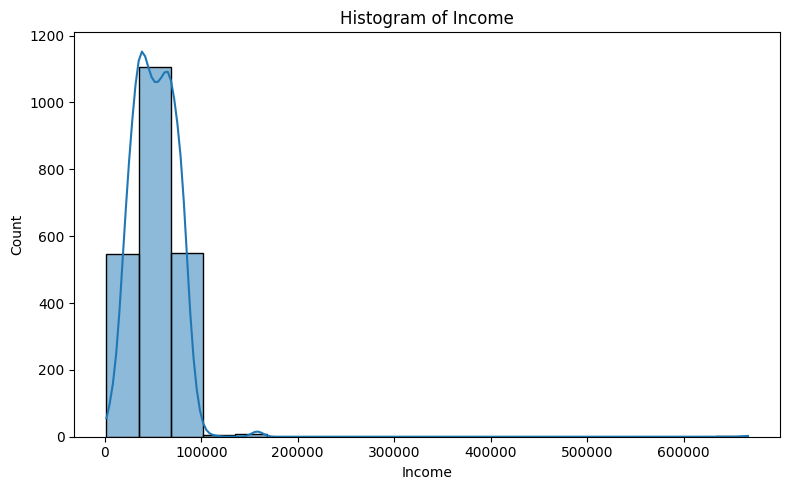

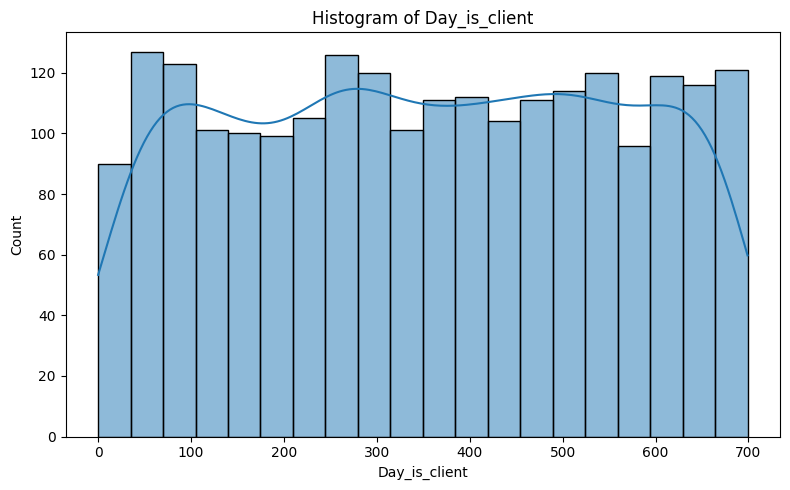

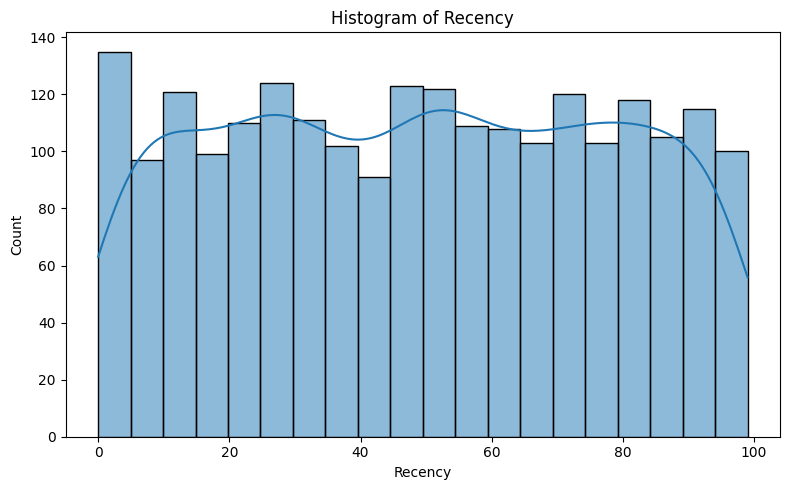

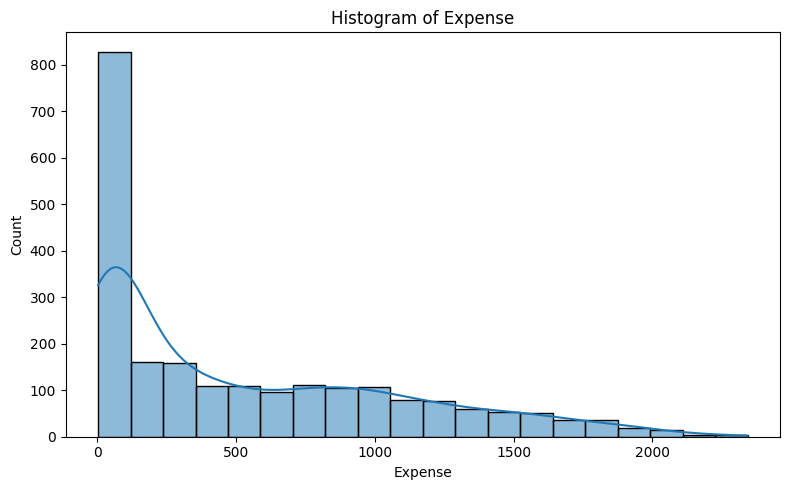

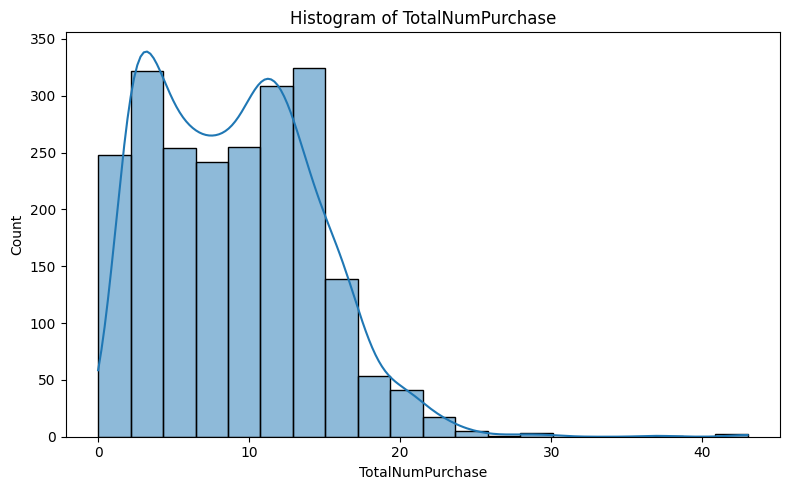

In [25]:
for column in numerical_columns:

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

<ipython-input-26-942eff831692>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette = 'coolwarm')


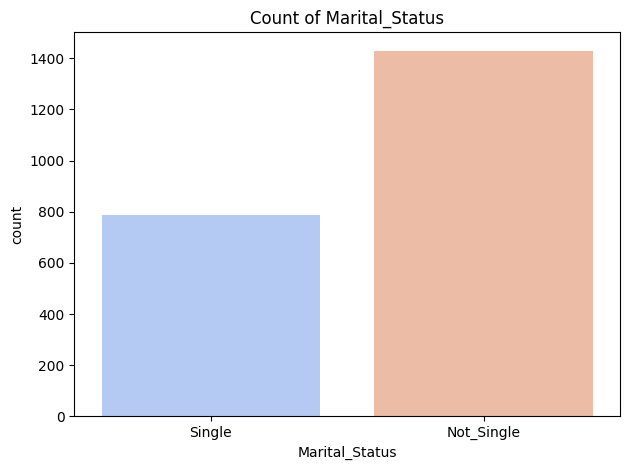

<ipython-input-26-942eff831692>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette = 'coolwarm')


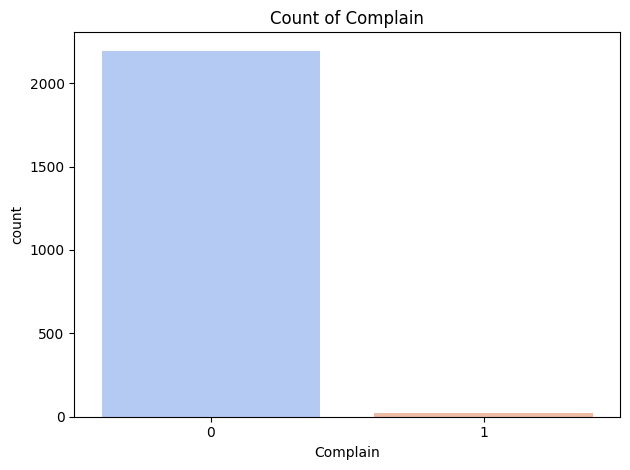

<ipython-input-26-942eff831692>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette = 'coolwarm')


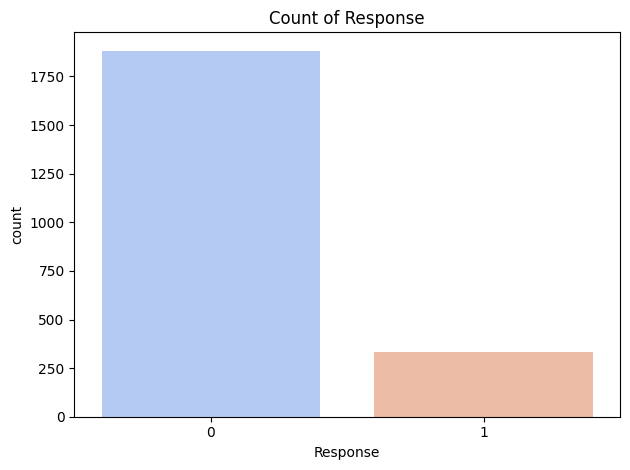

In [26]:
for column in binary_columns:

    sns.countplot(data=df, x=column, palette = 'coolwarm')
    plt.title(f'Count of {column}')

    plt.tight_layout()
    plt.show()

<Axes: >

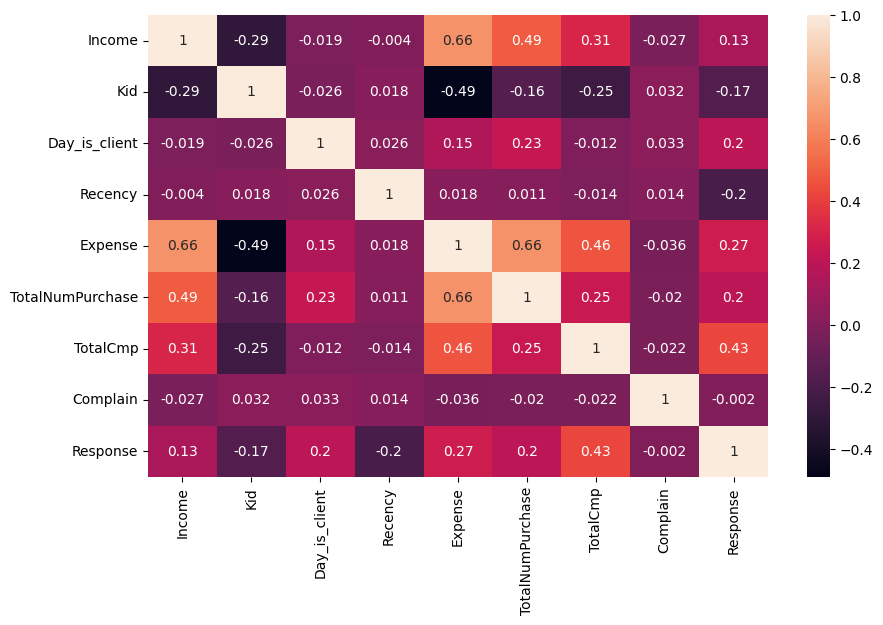

In [27]:
plt.figure(figsize = (10,6))
sns.heatmap(df_n.corr(), annot = True)

<Axes: >

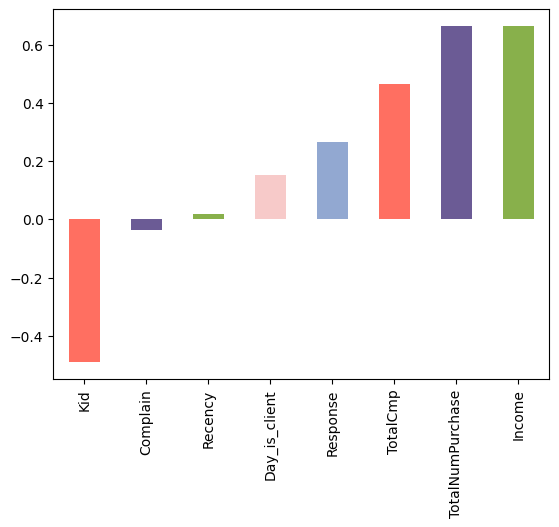

In [28]:
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
df_n.corr()['Expense'].drop('Expense').sort_values().plot(kind='bar', color = colors)

<Axes: >

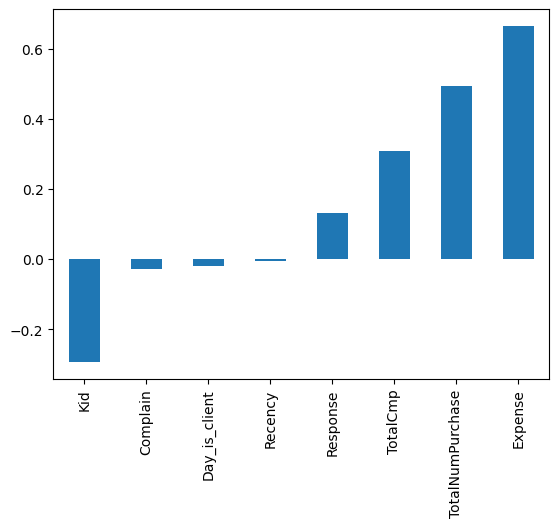

In [29]:
df_n.corr()['Income'].drop('Income').sort_values().plot(kind ='bar')

# **Encoding & Scaler**

In [30]:
# Define categorical columns to be one-hot encoded
categorical_columns = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding directly with pandas
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

In [31]:
df_encoded.head()

,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response,Education_PhD,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0,663,58,1441,21,0,0,1,0,0,0,1
1,46344.0,2,113,38,20,4,0,0,0,0,0,0,1
2,71613.0,0,312,26,713,11,0,0,0,0,0,0,0
3,26646.0,1,139,26,45,4,0,0,0,0,0,0,0
4,58293.0,1,161,94,380,13,0,0,0,1,0,0,0


In [32]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled.shape

(2216, 13)

# **Clustering**

In [50]:
# Transform the scaled data back to its original scale using the inverse transformation
X_transformed = scaler.inverse_transform(df_scaled)
X_transformed.shape


(2216, 13)

In [51]:
df_transformed = pd.DataFrame(X_transformed, columns=df_encoded.columns)

In [52]:
df_transformed

,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response,Education_PhD,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,1.110223e-16,663.0,58.0,1441.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,46344.0,2.000000e+00,113.0,38.0,20.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,71613.0,1.110223e-16,312.0,26.0,713.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26646.0,1.000000e+00,139.0,26.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58293.0,1.000000e+00,161.0,94.0,380.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,1.000000e+00,381.0,46.0,976.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2212,64014.0,3.000000e+00,19.0,56.0,436.0,17.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2213,56981.0,1.110223e-16,155.0,91.0,1205.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2214,69245.0,1.000000e+00,156.0,8.0,752.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [53]:
df_transformed['Kid'] = df_transformed['Kid'].round().astype(int)
df_transformed
#round()四舍五入

,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response,Education_PhD,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0,663.0,58.0,1441.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,46344.0,2,113.0,38.0,20.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,71613.0,0,312.0,26.0,713.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26646.0,1,139.0,26.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58293.0,1,161.0,94.0,380.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,61223.0,1,381.0,46.0,976.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2212,64014.0,3,19.0,56.0,436.0,17.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2213,56981.0,0,155.0,91.0,1205.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2214,69245.0,1,156.0,8.0,752.0,13.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### **Divide Customer into 2 groups: Income & Expense**

In [37]:
kmeans = KMeans(n_clusters = 2, max_iter=50)
kmeans.fit(df_scaled) #kmeans is sensitive to distance
y_kmeans = kmeans.fit_predict(df_scaled)

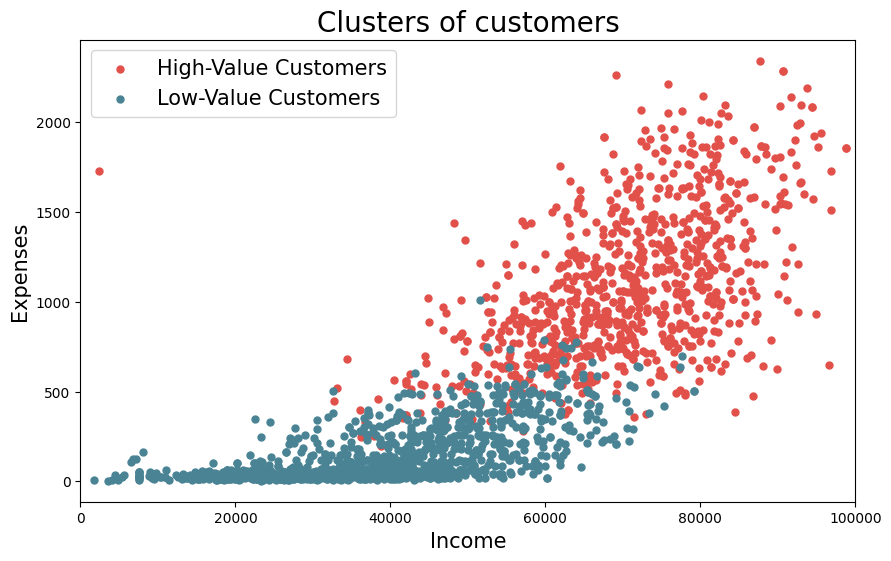

In [38]:
#original data, not scaled

plt.figure(figsize=(10,6))

plt.scatter(x= df_transformed.loc[y_kmeans == 0, df_transformed.columns[0]],
            y= df_transformed.loc[y_kmeans == 0, df_transformed.columns[4]],
            s=25, c='#E2504A', label='High-Value Customers')

plt.scatter(x= df_transformed.loc[y_kmeans == 1, df_transformed.columns[0]],
            y= df_transformed.loc[y_kmeans == 1, df_transformed.columns[4]],
            s=25, c='#498394', label='Low-Value Customers')

plt.title('Clusters of customers', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Expenses', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(0,100000)

plt.show()


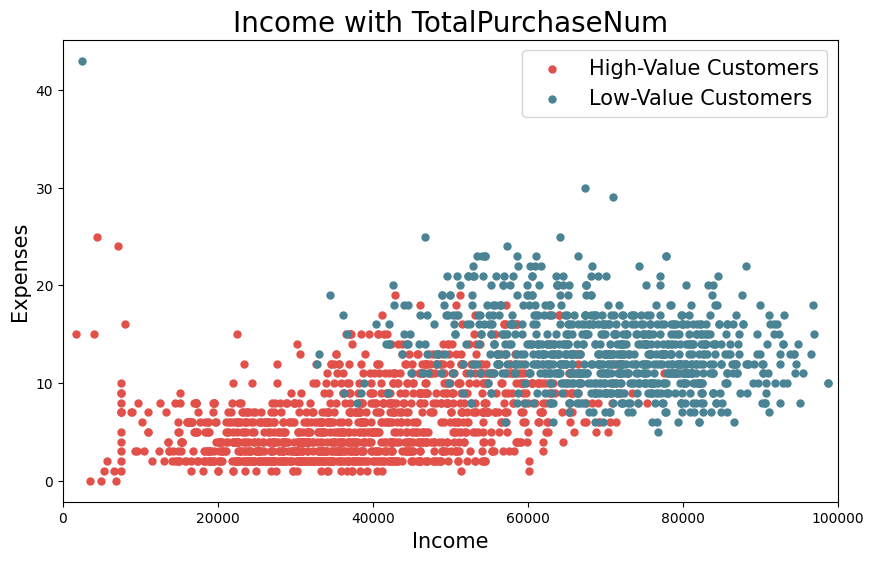

In [54]:
plt.figure(figsize=(10,6))

plt.scatter(x= df_transformed.loc[y_kmeans == 0, df_transformed.columns[0]],
            y= df_transformed.loc[y_kmeans == 0, df_transformed.columns[5]], # 5 是 TotalPurchaseNum
            s=25, c='#E2504A', label='High-Value Customers')

plt.scatter(x= df_transformed.loc[y_kmeans == 1, df_transformed.columns[0]],
            y= df_transformed.loc[y_kmeans == 1, df_transformed.columns[5]],
            s=25, c='#498394', label='Low-Value Customers')

plt.title('Income with TotalPurchaseNum', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Expenses', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(0,100000)
plt.legend(fontsize = 15)

plt.show()


# **Elbow Curve**

In [40]:
def optimize_k_means(data, max_k):
    means = []
    inertias = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    fig = plt.subplots(figsize = (10,5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

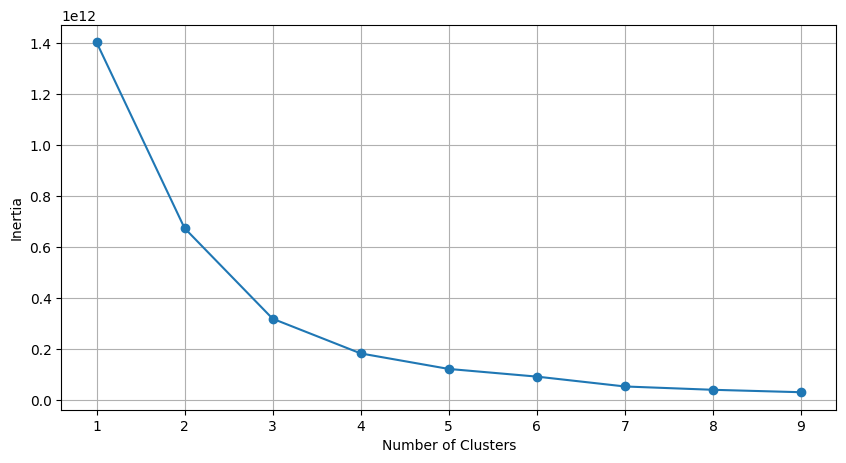

In [41]:
optimize_k_means(df_encoded, 10)

In [42]:
kmeans = KMeans(n_clusters=3, max_iter=50, random_state=42)
y_kmeans = kmeans.fit_predict(df_scaled)

In [43]:
df_transformed.head()

,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response,Education_PhD,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0,663.0,58.0,1441.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,46344.0,2,113.0,38.0,20.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,71613.0,0,312.0,26.0,713.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26646.0,1,139.0,26.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58293.0,1,161.0,94.0,380.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


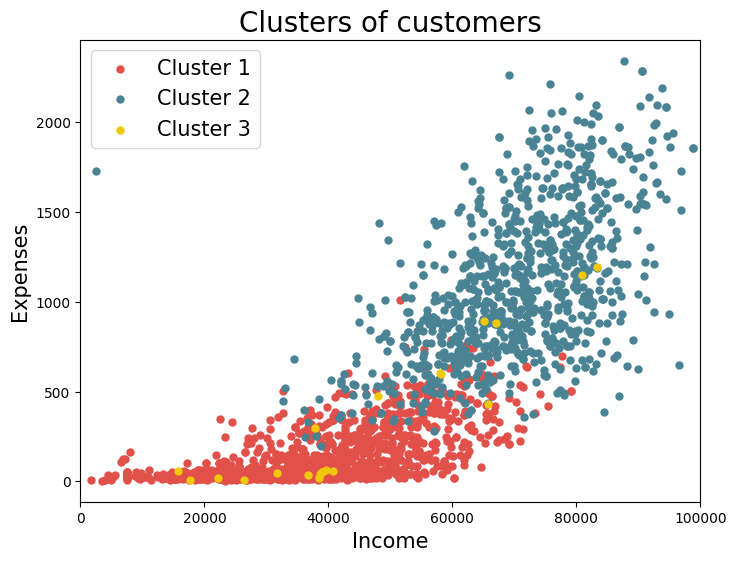

In [44]:
plt.figure(figsize=(8, 6))

plt.scatter(X_transformed[y_kmeans == 0, 0], X_transformed[y_kmeans == 0, 4], s=25, c='#E2504A', label='Cluster 1')

plt.scatter(X_transformed[y_kmeans == 1, 0], X_transformed[y_kmeans == 1, 4], s=25, c='#498394', label='Cluster 2')

plt.scatter(X_transformed[y_kmeans == 2, 0], X_transformed[y_kmeans == 2, 4], s=25, c='#F0C808', label='Cluster 3')

plt.title('Clusters of customers', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Expenses', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(0, 100000)

plt.show()


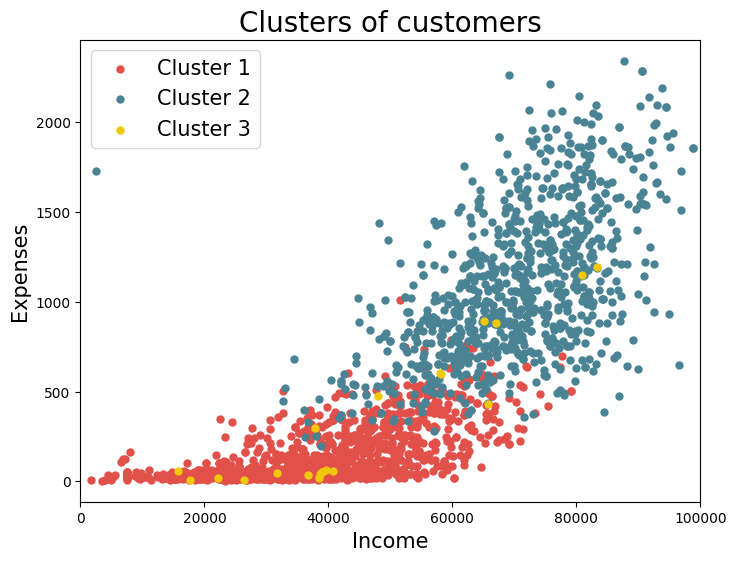

In [45]:
plt.figure(figsize=(8, 6))

plt.scatter(df_transformed.loc[y_kmeans == 0, df_transformed.columns[0]],
            df_transformed.loc[y_kmeans == 0, df_transformed.columns[4]],
            s=25, c='#E2504A', label='Cluster 1')

plt.scatter(df_transformed.loc[y_kmeans == 1, df_transformed.columns[0]],
            df_transformed.loc[y_kmeans == 1, df_transformed.columns[4]],
            s=25, c='#498394', label='Cluster 2')

plt.scatter(df_transformed.loc[y_kmeans == 2, df_transformed.columns[0]],
            df_transformed.loc[y_kmeans == 2, df_transformed.columns[4]],
            s=25, c='#F0C808', label='Cluster 3')

plt.title('Clusters of customers', fontsize=20)
plt.xlabel('Income', fontsize=15)
plt.ylabel('Expenses', fontsize=15)
plt.legend(fontsize=15)
plt.xlim(0, 100000)

plt.show()


In [57]:
df_transformed.head()

,Income,Kid,Day_is_client,Recency,Expense,TotalNumPurchase,TotalCmp,Complain,Response,Education_PhD,Education_Postgraduate,Education_Undergraduate,Marital_Status_Single
0,58138.0,0,663.0,58.0,1441.0,21.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,46344.0,2,113.0,38.0,20.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,71613.0,0,312.0,26.0,713.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26646.0,1,139.0,26.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,58293.0,1,161.0,94.0,380.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<ipython-input-47-aaef7bf5b811>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='coolwarm')  # Adjust palette as needed


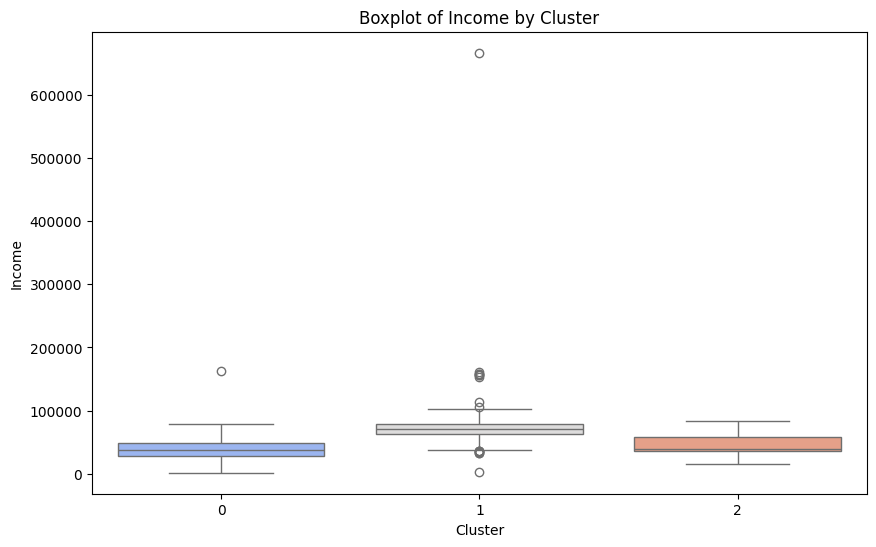

<ipython-input-47-aaef7bf5b811>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='coolwarm')  # Adjust palette as needed


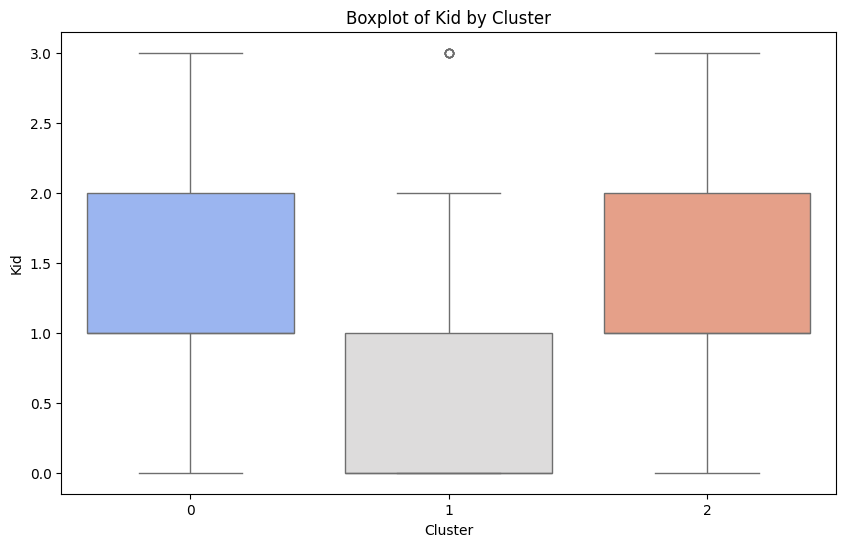

<ipython-input-47-aaef7bf5b811>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='coolwarm')  # Adjust palette as needed


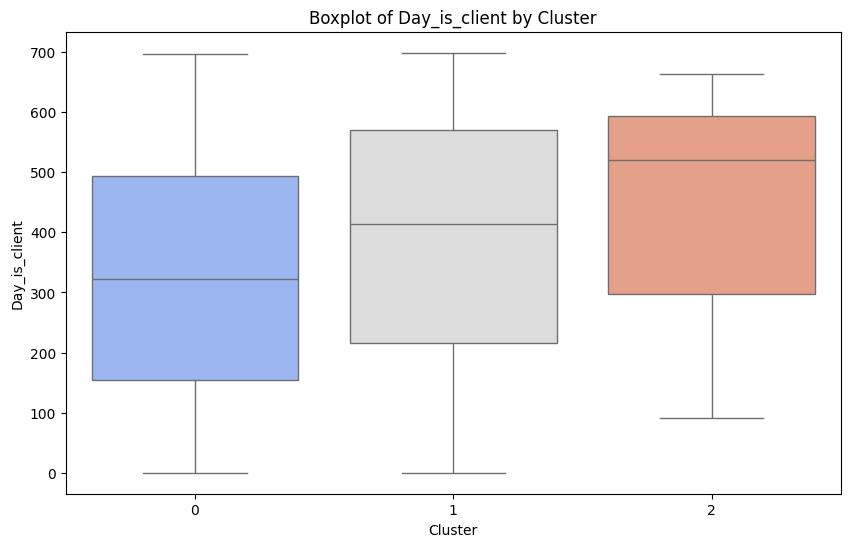

<ipython-input-47-aaef7bf5b811>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='coolwarm')  # Adjust palette as needed


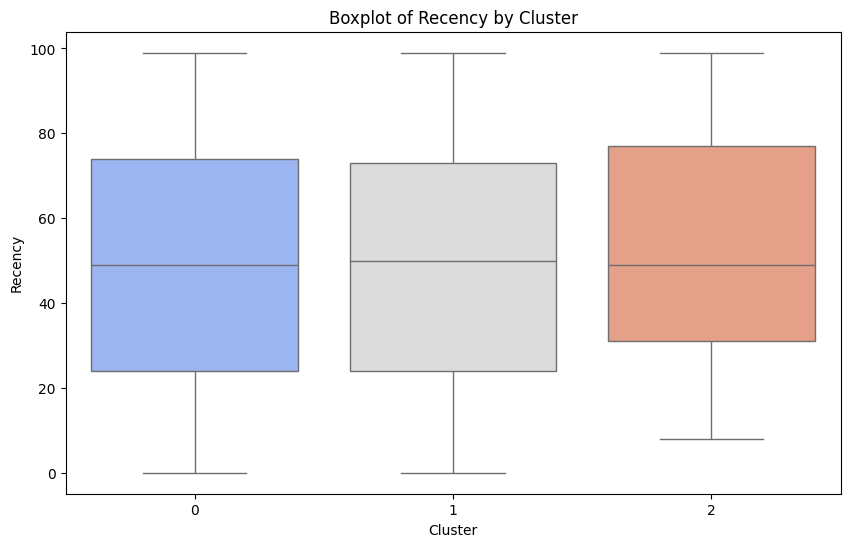

<ipython-input-47-aaef7bf5b811>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='coolwarm')  # Adjust palette as needed


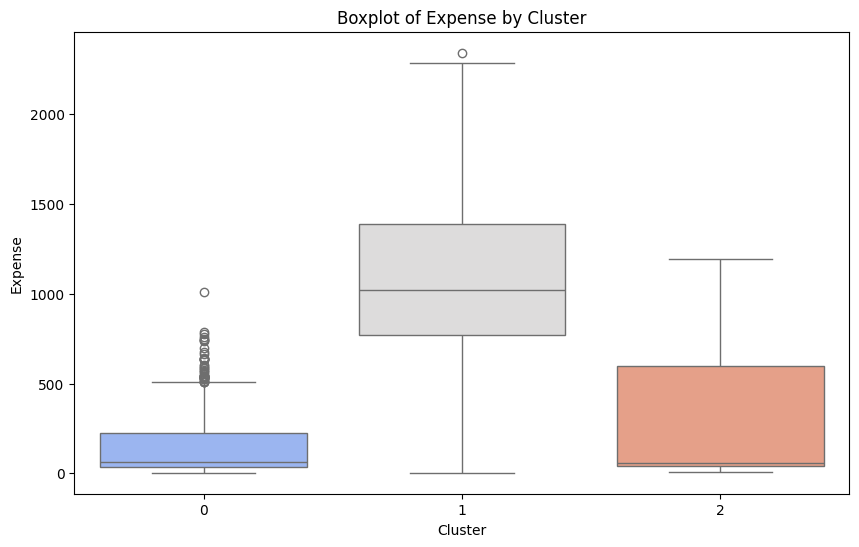

<ipython-input-47-aaef7bf5b811>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='coolwarm')  # Adjust palette as needed


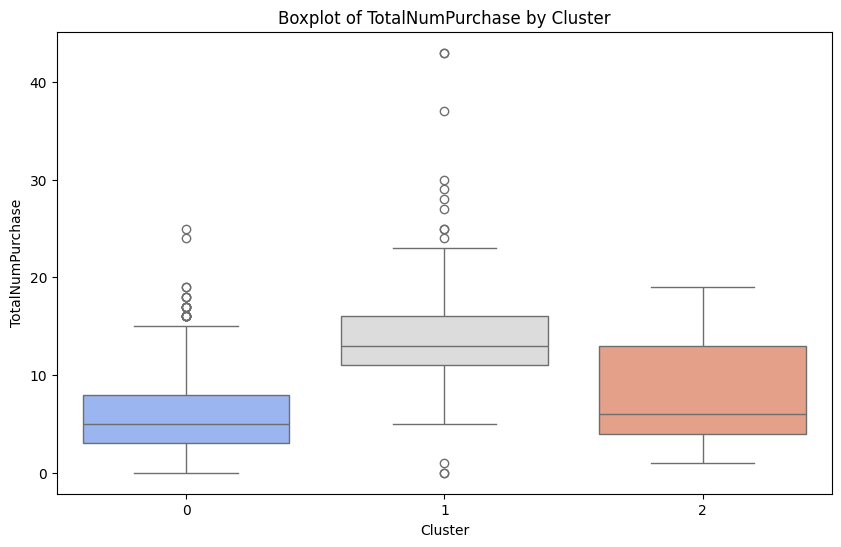

<ipython-input-47-aaef7bf5b811>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='coolwarm')  # Adjust palette as needed


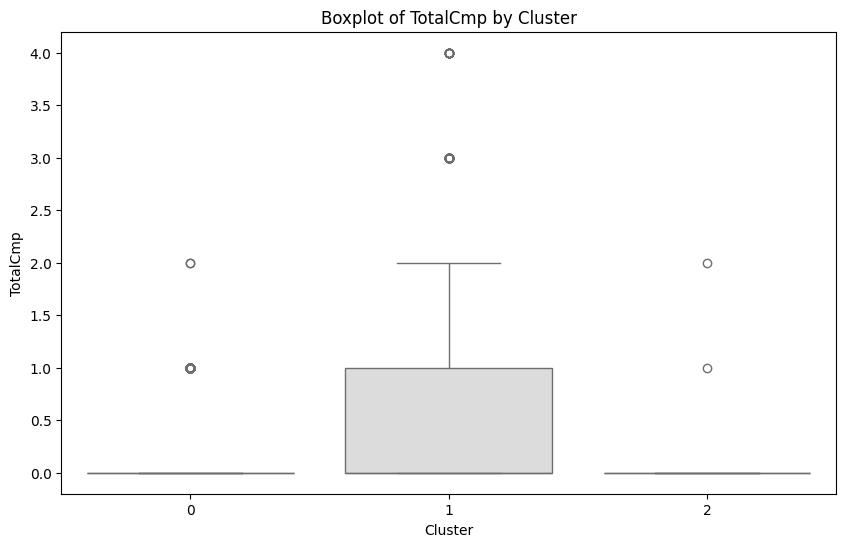

In [47]:
# Create a copy of the original DataFrame and add a new column 'Cluster'
df_clusters = df.copy()
df_clusters['Cluster'] = y_kmeans

# Select numerical columns to plot
columns_to_plot = ['Income', 'Kid', 'Day_is_client', 'Recency', 'Expense', 'TotalNumPurchase', 'TotalCmp']

# Plot boxplots for each numerical column
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df_clusters, palette='coolwarm')  # Adjust palette as needed
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

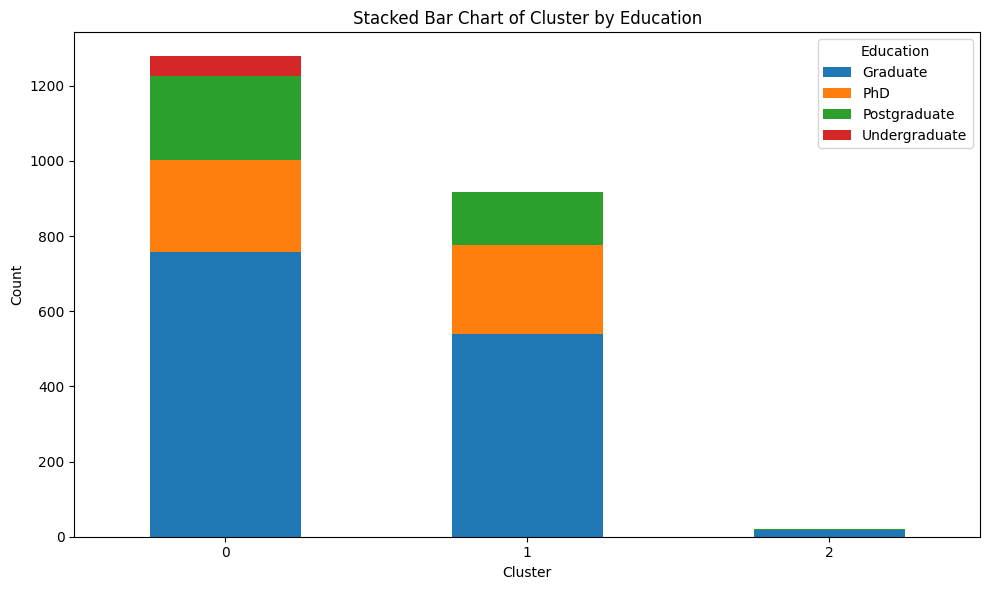

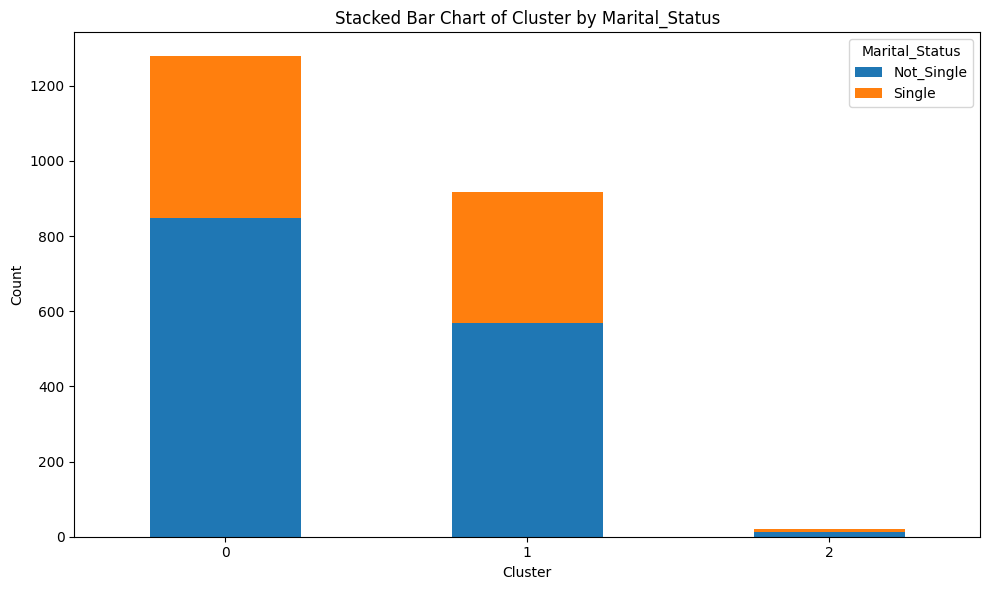

In [48]:


# List of categorical columns to plot
categorical_columns = ['Education', 'Marital_Status']

for column in categorical_columns:
    # Prepare data
    data = df_clusters.groupby(['Cluster', column]).size().unstack().fillna(0)

    # Plot stacked bar chart
    data.plot(kind='bar', stacked=True, figsize=(10, 6))

    plt.title(f'Stacked Bar Chart of Cluster by {column}')
    plt.xlabel('Cluster')
    plt.ylabel('Count')
    plt.legend(title=column)
    plt.xticks(rotation=0)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

# **Summery**



Based on the clustering analysis, we can summarize the characteristics of each cluster as follows:

Cluster 0 represents a high-income group with generally higher education levels (graduate or postgraduate), no children or one child, and typically has a partner. This group is characterized by having the highest number of purchases and highest expenses, but only occasionally accepts promotions.

Cluster 1 consists of a medium-income group, usually with a partner and 1 or 2 children. They also have a graduate or postgraduate degree but are characterized by low expenses and low number of purchases and do not accept promotions.

Cluster 2 represents a low-income group with undergraduate education, no children or one child, and low expenses and low purchases. Members of this cluster also do not accept promotions.